# Usage Distribution of Bike Rental  

## Investigation Overview 
I investigated the rental duration. I take a inspection look into the data and distribution. I obtain the relationship and trend in relationship with the key indidcator.   I obtain the result with visualization that shows the general and the outliner with the final goal of capture the best and wide usage of the bike for the location in various starting and ending station for the Lyft bike rental business. 

## Dataset Overview 
The data consisted of monthly rental data from  from 2019 to 2020 or more specifically from August of 2019 to April of 2020. The attributes included the user type, member gender, bike share for all trip, start time(month, hour), member birth year as well as additional measurements such as duration_sec, start_time,	end_time, start_station_id,	start_station_name,	start_station_latitude,	start_station_longitude,	end_station_id,	end_station_name,	end_station_latitude,	end_station_longitude,	bike_id	user_type	and bike_share_for_all_trip. 

With no information on how the station id is calculated by lattidue and longittude, we will be focusing on objectifing station. The data rows were cleaned from the analysis due to abnormality and missing information. Due to the fact that the station id is a good indicator for objectifing station.

In [30]:
# import library and error handling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

import warnings
warnings.simplefilter("ignore")

In [41]:
# load trip data accordingly
bike_rental_mon1 = pd.read_csv('./201908-baywheels-tripdata.csv')
bike_rental_mon2 = pd.read_csv('./201909-baywheels-tripdata.csv')
bike_rental_mon3 = pd.read_csv('./201910-baywheels-tripdata.csv')
bike_rental_mon4 = pd.read_csv('./201911-baywheels-tripdata.csv')
bike_rental_mon5 = pd.read_csv('./201912-baywheels-tripdata.csv')
bike_rental_mon6 = pd.read_csv('./202001-baywheels-tripdata.csv')
bike_rental_mon7 = pd.read_csv('./202002-baywheels-tripdata.csv')
bike_rental_mon8 = pd.read_csv('./202003-baywheels-tripdata.csv')
bike_rental_mon9 = pd.read_csv('./202004-baywheels-tripdata.csv')

In [51]:
# data unification
bike_rental = pd.concat([bike_rental_mon1, bike_rental_mon2, bike_rental_mon3, bike_rental_mon4, bike_rental_mon5, bike_rental_mon6,
                         bike_rental_mon7, bike_rental_mon8, bike_rental_mon9])

In [43]:
bike_rental.reset_index(drop=True, inplace=True)

In [44]:
bike_rental.dropna(inplace=True)

In [45]:
bike_rental.reset_index(drop=True, inplace=True)

## Distribution of Duration seconds 
Duration in seconds of the dataset is skewed. To correct this phenomemon, a logarithmic scaling is used in order to obtain the distribution of duration seconds with a normal distribution.

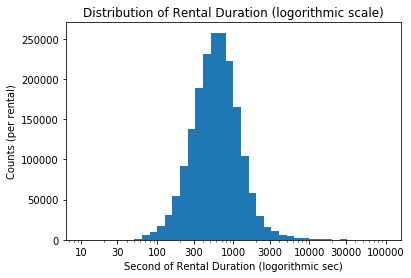

In [58]:
log_duration_bins = 10 ** np.arange(1, 5.0+0.1, 0.1)
ticks = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data=bike_rental, x='duration_sec', bins=log_duration_bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('Distribution of Rental Duration (logorithmic scale)')
plt.xlabel('Second of Rental Duration (logorithmic sec)')
plt.ylabel('Counts (per rental)');

## Count vs. End Station ID
The plotting with count and end station id show that the bike rental outliner often occur if the end station is about 250 and 30 as they produce two peaks among all stations. There are extreme stations for rental business that has short rental duration.

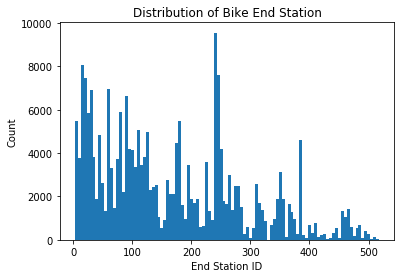

In [59]:
bike_bins = np.arange(bike_rental_cut_duration_outliers.end_station_id.min(), bike_rental_cut_duration_outliers.	end_station_id.max(), 5)

bike_rental_cut_duration_outliers = bike_rental.query('duration_sec < 300')
bike_rental_cut_duration_outliers.reset_index(drop=True, inplace=True)

plt.hist(data=bike_rental_cut_duration_outliers, x='end_station_id', bins=bike_bins);
plt.title('Distribution of Bike End Station')
plt.xlabel('End Station ID')
plt.ylabel('Count');

## Count vs. Start Station
Start station with small id usually has bike rental with small duration in second.

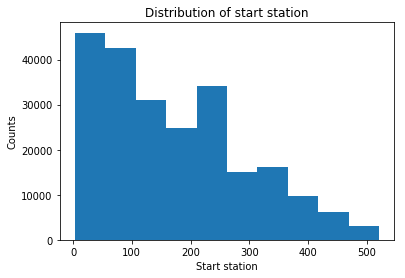

In [60]:
hour_bins = np.arange(0, 23+1, 1)
plt.hist(data=bike_rental_cut_duration_outliers, x='start_station_id', color=base_color)
plt.title('Distribution of start station')
plt.xlabel('Start station')
plt.ylabel('Counts');

## Duration seconds and Status of whether bike is shared for all trip or not
It shows that if the bike is not shared for all trip usually has higher duration in second for bike rental than those who shared bike for all trip ihn the data set.

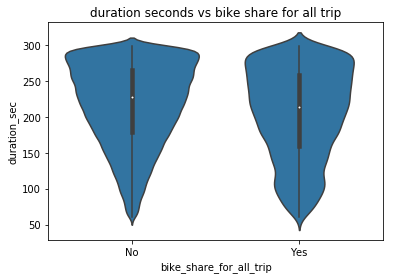

In [61]:
sns.violinplot(data=bike_rental_cut_duration_outliers, x='bike_share_for_all_trip', y='duration_sec', color=base_color)
plt.title('duration seconds vs bike share for all trip');

## Slide Creation
Upon execution with the final line below will create the slide with arrow control for presenting pages to audiences on screen accordingly.

In [ ]:
!jupyter nbconvert "Bike_Rental_Explanation.ipynb" --to slides --post serve --template output_toggle